#EE 782 : Advanced Topics in Machine Learning
Assignment 1\
20D070078\
Simran Tanwar

In [276]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [277]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Q1. (a) Plot minute-by-minute closing price series of few stocks.

In [278]:
# Define a function to read the data
def read_dataset(file_path):
  # Read the data into a DataFrame
  df = pd.read_csv(file_path, header=0, names=['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume'])
  # Convert "Datetime" column from a string object to date time object
  # Source : https://www.geeksforgeeks.org/python-pandas-to_datetime/
  df['Datetime'] = pd.to_datetime(df['Datetime'])
  # Filter rows with 'Time' between 09:30:00 and 16:00:00
  start_time = pd.to_datetime('09:30:00').time()
  end_time = pd.to_datetime('16:00:00').time()
  df_filtered = df[(df['Datetime'].dt.time >= start_time) & (df['Datetime'].dt.time <= end_time)]
  return df_filtered

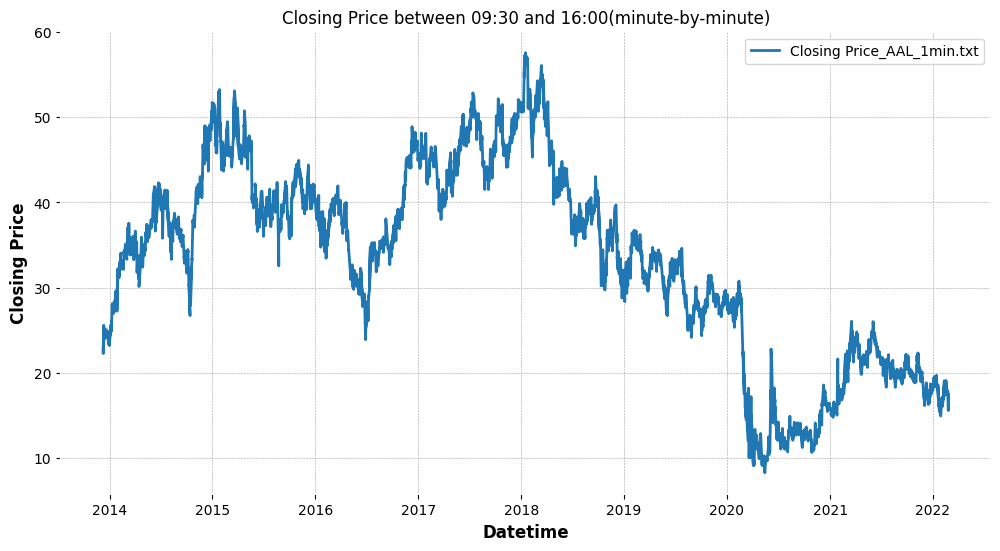

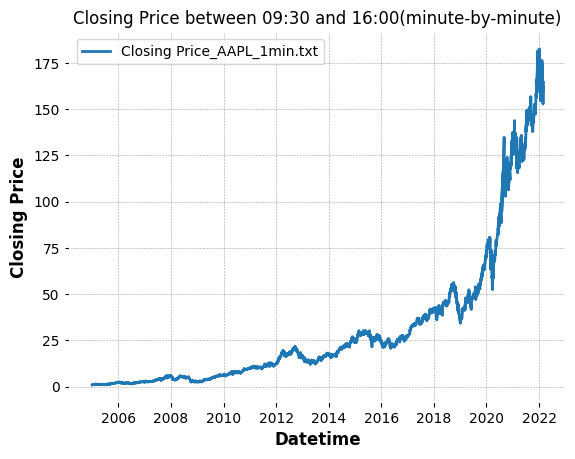

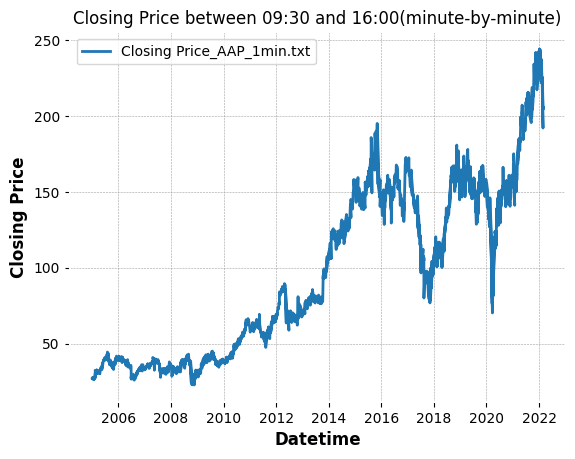

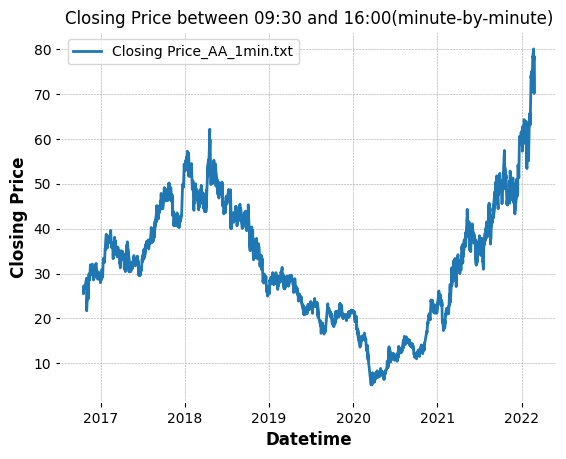

In [279]:
# Figure size
plt.figure(figsize=(12, 6))
# folder_path is the path to folder where all files are saved
folder_path = '/content/drive/MyDrive/EE782/sp500_tickers_A-D_1min_1pppix/'
# file_paths is the list of some text files from the folder
file_paths = ['AAL_1min.txt','AAPL_1min.txt','AAP_1min.txt','AA_1min.txt']
# To plot the Close price of the companies minute-by-minute in one plot
for file_path in file_paths:
  file_path_ = folder_path + file_path
  # Read dataset using above defined dictionary
  data_a = read_dataset(file_path_)
  # Plot the "Close" column
  plt.plot(data_a["Datetime"], data_a["Close"], label="Closing Price_"+file_path)

  plt.xlabel("Datetime")
  plt.ylabel("Closing Price")
  plt.title("Closing Price between 09:30 and 16:00(minute-by-minute)")
  plt.legend()

  # Show the plot
  plt.show()

#Q1(b)Plot the day-by-day closing price series of a few stocks.

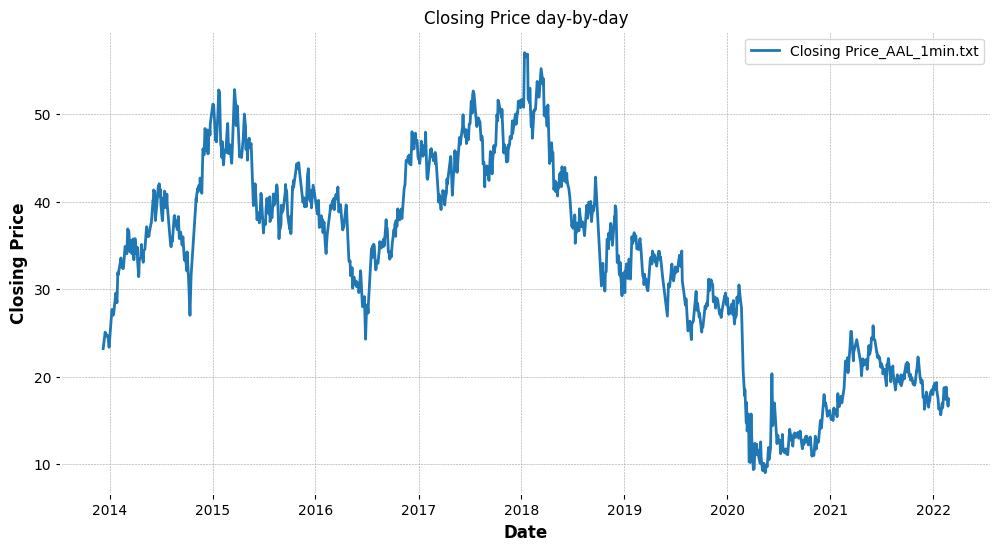

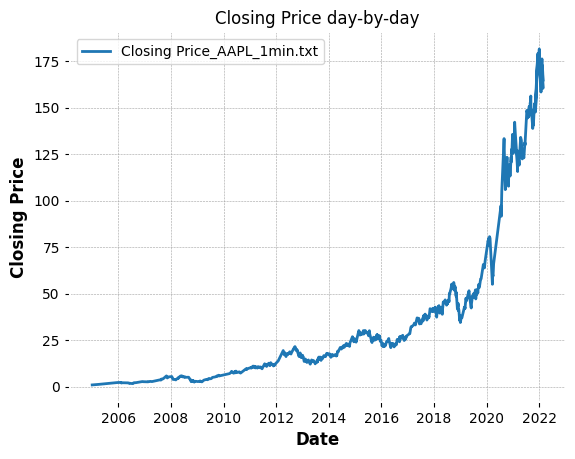

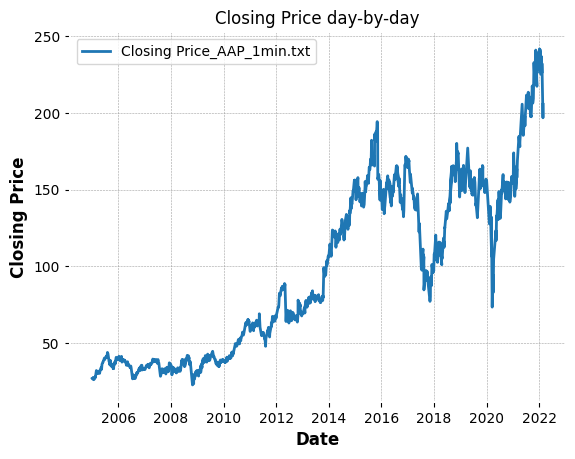

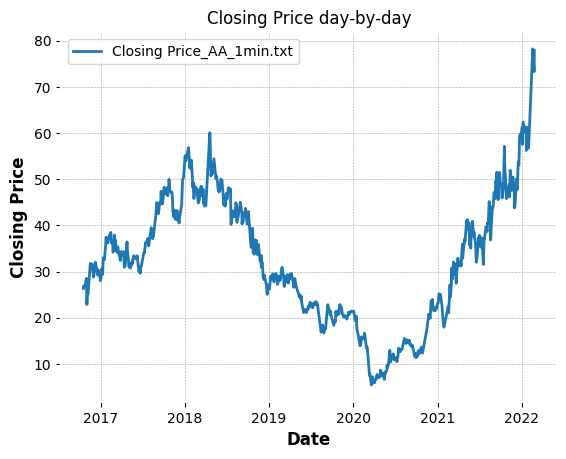

In [280]:
# Figure size
plt.figure(figsize=(12, 6))
# folder_path is the path to folder where all files are saved
folder_path = '/content/drive/MyDrive/EE782/sp500_tickers_A-D_1min_1pppix/'
# file_paths is the list of some text files from the folder
file_paths = ['AAL_1min.txt','AAPL_1min.txt','AAP_1min.txt','AA_1min.txt']
# To plot the Close price of the companies day-by-day in one plot
for file_path in file_paths:
  file_path_ = folder_path + file_path
  # Read dataset using above defined dictionary
  data_b = read_dataset(file_path_)
  # Separate date and time column
  data_b['Date'] = data_b['Datetime'].dt.date
  data_b['Time'] = data_b['Datetime'].dt.time
  # Reorder the columns
  data_b = data_b[['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']]
  # Group the data for "close" price for dates, and take the end closing price of each day
  d_new = data_b.groupby('Date')['Close'].last().reset_index()
  #print("Data"+file_path)
  #display(d_new)
  # Plot the "Close" column
  plt.plot(d_new["Date"], d_new["Close"], label="Closing Price_"+file_path)

  plt.xlabel("Date")
  plt.ylabel("Closing Price")
  plt.title("Closing Price day-by-day")
  plt.legend()

  # Show the plot
  plt.show()

#Q1(c) Plot a complete candlestick chart with volume on secondary y-axis for a few stocks with a time period of your choice


In [281]:
pip install mplfinance # Install mplfinance for candlestick plot

In [282]:
# Import library for candlestick plots
import mplfinance as fplt

In [283]:
# to use mplfinance to plot candlestick charts, we need to set index as datetime column
def process_data_candlestick(file_path):
  # Read data
  df = pd.read_csv(file_path,header=0, names=['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume'])
  # Set 'Datetime' column as index
  df.set_index(['Datetime'],inplace = True)
  df.index=pd.to_datetime(df.index)
  # Candlestick chart for one particular date
  date = pd.to_datetime('2019-01-03').date()
  df = df[df.index.date == date]
  # Data in trading hours
  start_time = pd.to_datetime('09:30:00').time()
  end_time = pd.to_datetime('16:00:00').time()
  df_filtered = df[(df.index.time >= start_time) & (df.index.time <= end_time)]
  return df_filtered

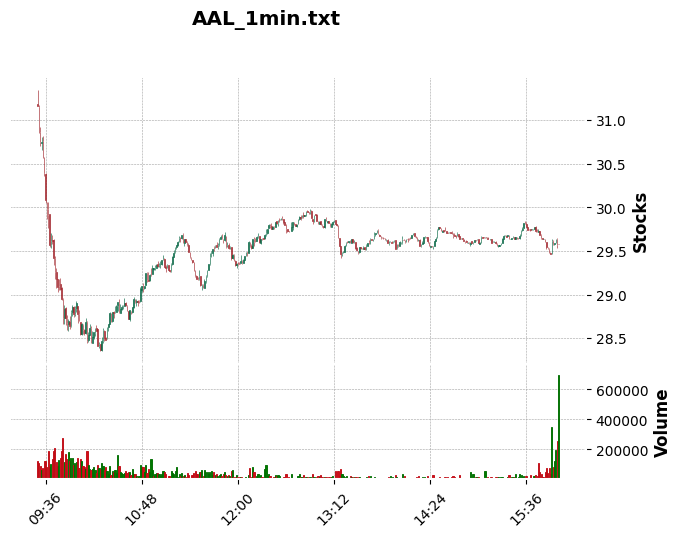

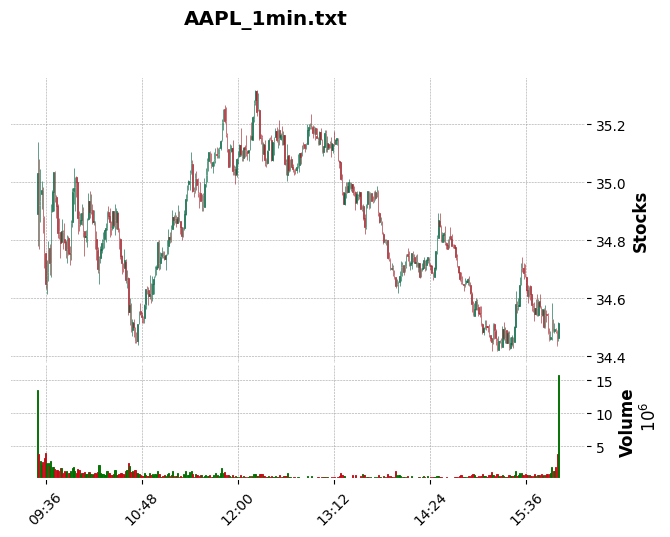

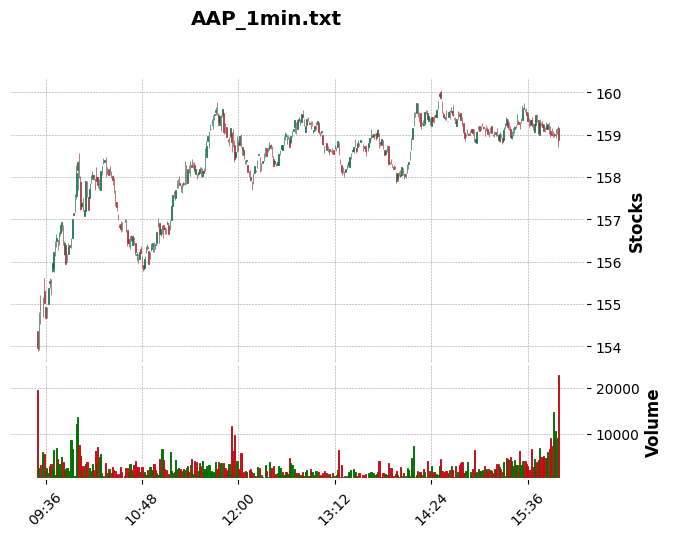

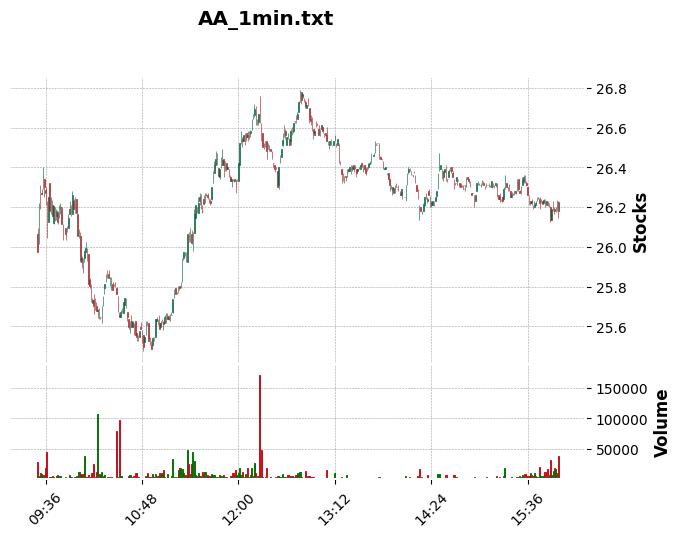

In [284]:
# folder_path is the path to folder where all files are saved
folder_path = '/content/drive/MyDrive/EE782/sp500_tickers_A-D_1min_1pppix/'
# file_paths is the list of some text files from the folder
file_paths = ['AAL_1min.txt','AAPL_1min.txt','AAP_1min.txt','AA_1min.txt']

# Candlestick charts for 4 stocks
for file_path in file_paths:
  file_path_ = folder_path + file_path
  # stock data for each one of them
  data_c = process_data_candlestick(file_path_)
  # Candlestick charts
  fplt.plot(
            data_c,
            type='candle',
            style='charles',
            title=file_path,
            ylabel='Stocks',
            volume=True,  # Show volume on the secondary y-axis
            ylabel_lower='Volume',
            show_nontrading=True
            )
# Source : https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh

#Q1(d) Note down your observations.


1. Minute by minute stocks have more fluctuations compare to day by day plots because minute by minute have more data points.
2. The plots are scattered over different timeline and have different values and to analyse trend and to make predictions we need to normalise it.
3. There are some unexpected jumps in volume.

#Q2 Try at least 2 ways to normalize the data as stock prices and volumes change over time and are different across companies, and pick one by noting your justification.

In [285]:
# folder_path is the path to folder where all files are saved
folder_path = '/content/drive/MyDrive/EE782/sp500_tickers_A-D_1min_1pppix/'
# file_paths is the list of some text files from the folder
file_paths = ['AAL_1min.txt','AAPL_1min.txt','AAP_1min.txt','AA_1min.txt']
# File path for APPLE stocks
file_path_ = folder_path + file_paths[1]
# Read data for AAPL stocks
AAPL_data = read_dataset(file_path_)
AAPL_data.head()

,Datetime,Open,High,Low,Close,Volume
49,2005-01-03 09:30:00,0.9906,0.9938,0.9906,0.9935,19181680
50,2005-01-03 09:31:00,0.9936,0.9956,0.9932,0.9936,4815272
51,2005-01-03 09:32:00,0.9933,0.9942,0.9910,0.9912,3166912
52,2005-01-03 09:33:00,0.9912,0.9950,0.9904,0.9910,3206000
53,2005-01-03 09:34:00,0.9910,0.9951,0.9874,0.9878,6159384


The two methods that I am going to try are :
1. Z-Score
2. Min-Max scaling


**Z-Score**: Z-score normalization, also known as standardization, is a commonly used technique for normalizing stock price data. It scales the data to have a mean of 0 and a standard deviation of 1.\
**Formula**\
Z = (X-μ)/σ\
Where \
Z = Z-score(Normalized value)\
X = Original Stock Price\
μ = Mean of stock price for given time period\
σ = Standard Deviation of the stock price for given time period

In [286]:
# Import library
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [287]:
# z-score
# Function for normalisation using z-score method
def standard_nrm(data):
  scaler = StandardScaler()
  # Standardising the data using z-score method
  # Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
  data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])
  # Standardised data
  return data

z_nrm_AAPL_data = standard_nrm(AAPL_data)
print('Standardised data for Apple:')
z_nrm_AAPL_data.head()

Standardised data for Apple:


,Datetime,Open,High,Low,Close,Volume
49,2005-01-03 09:30:00,-0.776614,-0.776516,-0.776627,-0.776538,10.670306
50,2005-01-03 09:31:00,-0.776537,-0.776470,-0.776560,-0.776536,2.214795
51,2005-01-03 09:32:00,-0.776544,-0.776506,-0.776617,-0.776598,1.244634
52,2005-01-03 09:33:00,-0.776599,-0.776486,-0.776632,-0.776603,1.267640
53,2005-01-03 09:34:00,-0.776604,-0.776483,-0.776710,-0.776685,3.005887


**Min-Max Scaling :** Min-Max scaling is another popular technique for normalizing stock price data. It scales the data to a specific range, typically [0, 1].\
**Formula**\
$X_{normalised}$ = ($X$ - $X_{min}$)/($X_{max}$ - $X_{min}$)\
where\
$X_{normalised}$ = Normalised stock value\
$X$ = Original Stock Value\
$X_{min}$ = Minimum Stock value in the given time period\
$X_{max}$ = Maximum stock value in the given time period

In [288]:
def MinMax_nrm(data):
  # Min-Max Scaler
  scaler = MinMaxScaler()
  # Normalizing the data using MinMax Scaler method
  # Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
  data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])
  # Normalized data
  return data

m_nrm_AAPL_data = MinMax_nrm(AAPL_data)
print('Normalised Data for Apple:')
m_nrm_AAPL_data.head()

Normalised Data for Apple:


,Datetime,Open,High,Low,Close,Volume
49,2005-01-03 09:30:00,0.000181,0.000193,0.000184,0.000197,0.084400
50,2005-01-03 09:31:00,0.000198,0.000202,0.000198,0.000198,0.021187
51,2005-01-03 09:32:00,0.000196,0.000195,0.000186,0.000184,0.013934
52,2005-01-03 09:33:00,0.000184,0.000199,0.000183,0.000183,0.014106
53,2005-01-03 09:34:00,0.000183,0.000200,0.000166,0.000166,0.027101


I am going to use Z-score for normlization because:
1. Z-score normalization transforms our data to have a mean of 0 and a standard deviation of 1. This is useful when we want to compare variables on a similar scale.
2. It's less sensitive to outliers compared to Min-Max scaling. Outliers have a reduced impact on the resulting normalized values.
3. Standardization can be beneficial when you plan to use techniques like gradient-based optimization algorithms where feature scaling can affect the performance.

#Q3 Make some scenario decisions:
#(a) high-frequency trading or intra-day swing, or intra-day trade, or long-term(multi-day or multi-week or multi-month).

1. **High-Frequency Trading:** High-frequency trading involves making a large number of trades in a short time frame (often seconds or minutes). It requires quick decision-making, low-latency technology, and access to real-time data. This approach is risky and not suitable for all traders.

2. **Intra-Day Swing Trading:** Intra-day swing trading involves holding positions for hours or a day, aiming to profit from price fluctuations within that time frame. You analyze technical and sometimes fundamental factors to make trading decisions.

3. **Intra-Day Trading:**Intra-day trading focuses on short-term price movements, often holding positions for minutes to a few hours. It requires sharp technical analysis skills, risk management, and discipline. Be prepared for high volatility and rapid decision-making.

4. **Long-Term Investing (Multi-Day, Multi-Week, or Multi-Month):**Long-term investing involves buying and holding assets for extended periods, often based on fundamental analysis. It suits those who prefer a more passive approach, allowing time for investments to grow over weeks, months, or years.


Intra-day Swing strategy involves making multiple trades within a single trading day to capture short- to medium-term price swings.
(a)Traders aim to profit from both upward and downward price movements.\
(b)Requires constant monitoring of the market and quick decision-making.\
(c)Typically, traders might make several trades in a day but close all positions by the end of the trading day.

#Q3(b)Assume a buy-ask spread(inversely related to volume and directly related to price) and trade commision based on a quick market research. Your trade will lose the buy-ask spread and commissions everytime you trade.

1. Assume a moderate buy-ask spread, which means that there isn't a significant gap between the stock's bid and ask prices.
2. Choose a low commission rate, which minimizes the fees you pay for each trade.
3.  Keep in mind that your overall profitability will be impacted by these trading charges, therefore it's critical to effectively control them.

#Q3(c)Decide if you will trade only one stock, or have a model to trade a basket from a particular industry, or any stock.

1. Use a trading strategy that is targeted towards a particular area or industry, such as technology, healthcare, or finance.
2. Within a given industry, diversification can reduce risk and assist capitalize on sector-specific trends.
3. To find possible trades, conduct in-depth investigation and analysis inside the specified industry.


#Q4 Write a pytorch module for defining an LSTM model. Keep it flexible so that the input dimension, number of units, number of layers can easily be changed.

In [289]:
# Import libraries
import torch
import torch.nn as nn

In [290]:
# Define a custom LSTM model by inheriting from nn.Module
class LSTMModel(nn.Module):
    def __init__(self, input_d, hidden_d, layer_d, output_d):
        super(LSTMModel, self).__init__()

        # the number of hidden dimensions and layers is defined.
        # Dimension of the hidden state
        self.hidden_dim = hidden_d
        # Number of LSTM layers
        self.layer_dim = layer_d

        # Create an LSTM layer
        # input_dim: Input feature dimension
        # hidden_dim: Number of LSTM units in the hidden state
        # layer_dim: Number of LSTM layers stacked on top of each other
        # batch_first=True: Input data is in the form (batch_size, sequence_length, input_dim)
        self.lstm = nn.LSTM(input_d, hidden_d, layer_d, batch_first=True)

        # Create a fully connected (linear) layer for the output
        # It maps the LSTM output to the desired output dimension
        self.fc = nn.Linear(hidden_d, output_d)

    # Define the forward function to create the forward pass for the LSTM model.
    def forward(self, x):
        # Initialize the initial hidden and cell states with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        # Pass the input through the LSTM layer
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        # Take the output from the last time step and pass it through the linear layer
        # to get the final prediction
        out = self.fc(out[:, -1, :])
        return out


# Source for above code : https://www.educative.io/answers/how-to-build-an-lstm-model-using-pytorch

In [291]:
demo_input_dim = 5
demo_hidden_dim = 32
demo_layer_dim = 2
demo_output_dim = 5

demo_model = LSTMModel(demo_input_dim, demo_hidden_dim, demo_layer_dim, demo_output_dim)
# Define the loss function for classification tasks
demo_loss_fn = torch.nn.MSELoss()
# Initialize the optimizer, which will update the model parameters during training
optimiser = torch.optim.Adam(demo_model.parameters(), lr=0.01)

print(demo_model)
print(len(list(demo_model.parameters())))
for i in range(len(list(demo_model.parameters()))):
    print(list(demo_model.parameters())[i].size())

LSTMModel(
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=5, bias=True)
)
10
torch.Size([128, 5])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([5, 32])
torch.Size([5])


#Q5 Write a flexible dataloader for training the LSTM model, especially if you are high frequency data. The inputs should be open, close, high, low ,volume of one or more stocks(e.g. other stocks that can help predict the chosen stock price.)

In [292]:
class data_loader:
  #fsu = future step in units, type is string
  def resample_data(self,file_path,fsu):
    stocks  = read_dataset(file_path)
    # Set the 'Datetime' column as the index of the DataFrame
    stocks.set_index('Datetime', inplace=True)
    # Resample the data to a daily frequency by aggregating the data
    new_stock = stocks.resample(fsu).agg({'Open':'first','High':'max','Low':'min','Close': 'last', 'Volume': 'sum'})
    new_stock = new_stock.dropna()
    return new_stock
    # Source : https://stackoverflow.com/questions/47938372/pandas-dataframe-resample-aggregate-function-use-multiple-columns-with-a-customi

# Function to normalise data, I am using Z-score for normalization here( JUSTIFICATION)
  def normalised_data(self,file_path,fsu):
    data = self.resample_data(file_path,fsu)
    # z-score
    scaler = StandardScaler()
    # Standardising the data using z-score method
    # Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
    data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])
    # Standardised data
    return scaler ,data

  # function to load single stock(create train, test data given stock data and sequence length)
  def load_data(self,nrm_data,look_back = 60):
    data_raw = nrm_data.values # convert to numpy array
    data = []

    # Create all possible sequences of length look_back

    for index in range(len(data_raw) - look_back):
        data.append(data_raw[index: index + look_back])

    # Data array is like this : [[open high low close volume]_(total points in data - look back , 5) [...] ....[...]] of shape (total points in data, total points in data - look back , 5)
    data = np.array(data);
    # Divide dataset into training and testing set as 80-20%
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    # fs = future steps, we want to predict

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1,:]
    y_test = data[train_set_size:,-1,:]

    # make training and test sets in torch
    x_train = torch.from_numpy(x_train).type(torch.Tensor)
    x_test = torch.from_numpy(x_test).type(torch.Tensor)
    y_train = torch.from_numpy(y_train).type(torch.Tensor)
    y_test = torch.from_numpy(y_test).type(torch.Tensor)
    return [x_train, y_train, x_test, y_test]

  def add_stock_load(self, stock,add_stock,look_back,fs):
    data_raw_stock = stock.values # convert to numpy array
    data_raw_add_stock = add_stock.values
    data_raw = np.hstack((data_raw_stock,data_raw_add_stock))
    data = []

    # Create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back):
        data.append(data_raw[index: index + look_back])

    # Data array is like this : [[open high low close volume]_(total points in data - look back , 5) [...] ....[...]]^T of shape (total points in data, total points in data - look back , 5)
    data = np.array(data);
    # Divide dataset into training and testing set as 80-20%
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:5]

    x_test = data[train_set_size:,:-1,:]
    y_test = data[train_set_size:,-1,:]

    # make training and test sets in torch
    x_train = torch.from_numpy(x_train).type(torch.Tensor)
    x_test = torch.from_numpy(x_test).type(torch.Tensor)
    y_train = torch.from_numpy(y_train).type(torch.Tensor)
    y_test = torch.from_numpy(y_test).type(torch.Tensor)
    return [x_train, y_train, x_test, y_test]
data_loader = data_loader()
#Source : Kaggle

In [293]:
# Give ticker symbol to get the data of the company based on day by day data
folder_path = '/content/drive/MyDrive/EE782/sp500_tickers_A-D_1min_1pppix/'
suff = '_1min.txt'
tick_sym = input("Give ticker symbol of the company:")
file_path = folder_path + tick_sym + suff
fsu = '1D'
daily_stocks = data_loader.resample_data(file_path, fsu)
display(daily_stocks)

Give ticker symbol of the company:AA


,Open,High,Low,Close,Volume
Datetime,,,,,
2016-10-18,26.4084,26.5077,25.4741,26.3487,12200201
2016-10-19,26.2692,27.2631,26.2096,26.8755,9411380
2016-10-20,26.8059,27.0097,26.4531,26.5276,7494372
2016-10-21,26.4084,26.8954,26.1698,26.7165,5992444
2016-10-24,26.8457,26.8854,26.5972,26.6966,5416589
...,...,...,...,...,...
2022-02-18,76.0300,78.3700,75.5500,78.2000,4611780
2022-02-22,80.0000,80.0800,73.1100,74.0900,7228369
2022-02-23,74.2500,75.6800,73.1101,75.3200,5373945


In [294]:
# Showing normalised data
nrm_stocks = data_loader.normalised_data(file_path,fsu)[1]
nrm_stocks.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2016-10-18,-0.428431,-0.459553,-0.457927,-0.432254,2.646856
2016-10-19,-0.438416,-0.406421,-0.404239,-0.394599,1.673488
2016-10-20,-0.399917,-0.424244,-0.386464,-0.419466,1.004404
2016-10-21,-0.428431,-0.432284,-0.407144,-0.405964,0.480194
2016-10-24,-0.397062,-0.432987,-0.375946,-0.407386,0.279206


In [295]:
# Taking look back = 60
look_back_demo = 60 # choose sequence length
# get the training and testing set
load_data_demo = data_loader.load_data(nrm_stocks,look_back_demo)
x_train_demo, y_train_demo, x_test_demo, y_test_demo = load_data_demo
print('x_train_demo.shape = ',x_train_demo.shape)
print('y_train_demo.shape = ',y_train_demo.shape)
print('x_test_demo.shape = ',x_test_demo.shape)
print('y_test_demo.shape = ',y_test_demo.shape)

x_train_demo.shape =  torch.Size([1031, 59, 5])
y_train_demo.shape =  torch.Size([1031, 5])
x_test_demo.shape =  torch.Size([258, 59, 5])
y_test_demo.shape =  torch.Size([258, 5])


#Q6 Train or pre-train the model by trying to predict the future price(or change in price, if normalized) and keep the future horizon flexible(e.g.,easy to change between one minute or 10 minutes into the future). You can try to predict the opening or closing time. Leave the last two years out for testing.

In [296]:
input_dim = 5  # Assuming 5 features (Open, High, Low, Close, Volume)
hidden_dim = 32  # Adjust based on your choice
layer_dim = 2  # Adjust based on your choice
output_dim = 5  # Adjust based on your task (here I am predicting all 5 columns)
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
# Define the loss function for classification tasks
loss_fn = torch.nn.MSELoss()
# Initialize the optimizer, which will update the model parameters during training
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
# Source for above code : https://www.educative.io/answers/how-to-build-an-lstm-model-using-pytorch

print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTMModel(
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=5, bias=True)
)
10
torch.Size([128, 5])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([5, 32])
torch.Size([5])


In [297]:
# Normalised data with the scaler used in data loader
nrm_stocks_scaler = data_loader.normalised_data(file_path,fsu ='1D')
# Scaler used
scaler = nrm_stocks_scaler[0]
# Normalised data
nrm_stocks_6 = nrm_stocks_scaler[1]
# Since we want the last 2 years for testing, leaving those two years
date = pd.to_datetime('2021-01-01').date()
nrm_stocks_6_train= nrm_stocks_6[nrm_stocks_6.index.date <= date]
print(nrm_stocks_6_train)

                Open      High       Low     Close    Volume
Datetime                                                    
2016-10-18 -0.428431 -0.459553 -0.457927 -0.432254  2.646856
2016-10-19 -0.438416 -0.406421 -0.404239 -0.394599  1.673488
2016-10-20 -0.399917 -0.424244 -0.386464 -0.419466  1.004404
2016-10-21 -0.428431 -0.432284 -0.407144 -0.405964  0.480194
2016-10-24 -0.397062 -0.432987 -0.375946 -0.407386  0.279206
...              ...       ...       ...       ...       ...
2020-12-24 -0.725906 -0.756113 -0.728855 -0.747948 -1.266485
2020-12-28 -0.740941 -0.708391 -0.708460 -0.729406 -0.362320
2020-12-29 -0.740224 -0.756113 -0.776929 -0.743666 -0.513685
2020-12-30 -0.743086 -0.697158 -0.716475 -0.678763 -0.525015
2020-12-31 -0.676518 -0.679617 -0.685883 -0.671630 -0.526826

[1059 rows x 5 columns]


In [298]:
# Split data into training and testing set
look_back = 60
load_data = data_loader.load_data(nrm_stocks_6_train,look_back)
x_train, y_train, x_test, y_test = load_data
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  torch.Size([799, 59, 5])
y_train.shape =  torch.Size([799, 5])
x_test.shape =  torch.Size([200, 59, 5])
y_test.shape =  torch.Size([200, 5])


In [299]:
# Define a function to train the model
def train_model(num_epochs, look_back,x_train , y_train):
    # Initialize an array to store the training loss for each epoch
    hist = np.zeros(num_epochs)

    # Determine the number of time steps to unroll
    seq_dim = look_back - 1

    # Loop through the specified number of training epochs
    for t in range(num_epochs):
        # The forward pass computes predictions (y_train_pred) for the entire training dataset (x_train) using the LSTM model.
        y_train_pred = model(x_train)

        # Calculate the loss between predicted and actual values
        loss = loss_fn(y_train_pred, y_train)

        # Print the loss every 10 epochs (excluding the first epoch)
        if t % 10 == 0 and t != 0:
            print("Epoch ", t, "MSE: ", loss.item())

        # Store the loss for this epoch
        hist[t] = loss.item()

        # Zero out the gradients to prevent accumulation
        optimiser.zero_grad()

        # Backward pass: Compute gradients with respect to the loss
        loss.backward()

        # Update the model parameters using the computed gradients
        optimiser.step()

    # Plot the training loss over epochs
    plt.figure(figsize=(10, 5))
    plt.plot(np.arange(num_epochs), hist, label='Training Loss', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Training Loss Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Source: Kaggle

Epoch  10 MSE:  0.19407205283641815
Epoch  20 MSE:  0.1188378632068634
Epoch  30 MSE:  0.10030212253332138
Epoch  40 MSE:  0.09114333987236023
Epoch  50 MSE:  0.0839187502861023
Epoch  60 MSE:  0.07944789528846741
Epoch  70 MSE:  0.07622840255498886
Epoch  80 MSE:  0.07386620342731476
Epoch  90 MSE:  0.07202424108982086
Epoch  100 MSE:  0.0732782781124115
Epoch  110 MSE:  0.07090577483177185
Epoch  120 MSE:  0.0693320780992508
Epoch  130 MSE:  0.06816636770963669
Epoch  140 MSE:  0.06695539504289627


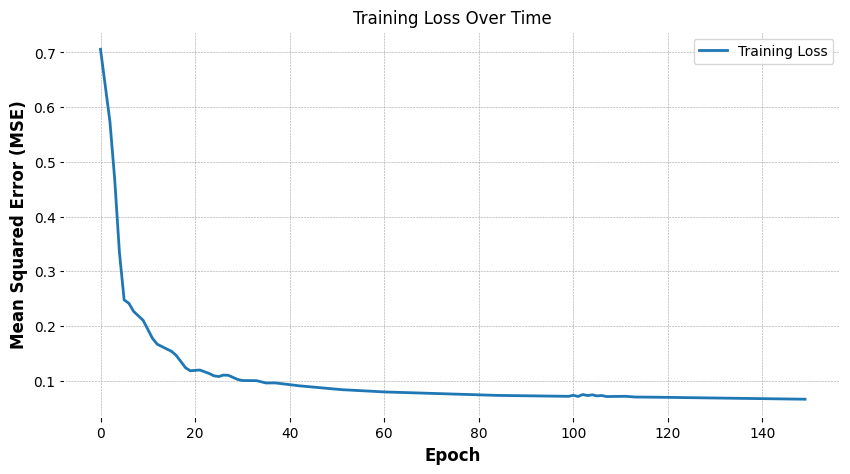

In [300]:
# Call the train_model function with specified parameters
train_model(150,60,x_train,y_train)

As we can see training loss is decreasing with the no. of epochs increases.

In [301]:
# Save the trained model to a file
trained_model_path = '/content/drive/MyDrive/EE782/saved_trained_model/traine_model.txt'
torch.save(model.state_dict(), trained_model_path)

In [302]:
print(scaler)

StandardScaler()


In [303]:
# Import libraries
import math
from math import sqrt
from sklearn.metrics import mean_squared_error

In [304]:
# Make predictions using the trained model on the testing data
y_train_pred = model(x_train)
y_test_pred = model(x_test)

# Invert (reverse) the predictions to the original scale
# This is necessary because the model was trained on scaled data
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())  # Inverse transform predictions for training data
y_train = scaler.inverse_transform(y_train.detach().numpy())  # Inverse transform actual training data
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())  # Inverse transform predictions for testing data
y_test = scaler.inverse_transform(y_test.detach().numpy())  # Inverse transform actual testing data

# Calculate the Root Mean Squared Error (RMSE) for both training and testing predictions
# RMSE measures the average prediction error, with lower values indicating better model performance
# For RMSE calculation, we compare the predicted and actual values for the first column (assuming a univariate prediction task)
trainScore = math.sqrt(mean_squared_error(y_train[:, 0], y_train_pred[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:, 0], y_test_pred[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))


# Source : Kaggle


Train Score: 0.72 RMSE
Test Score: 1.76 RMSE


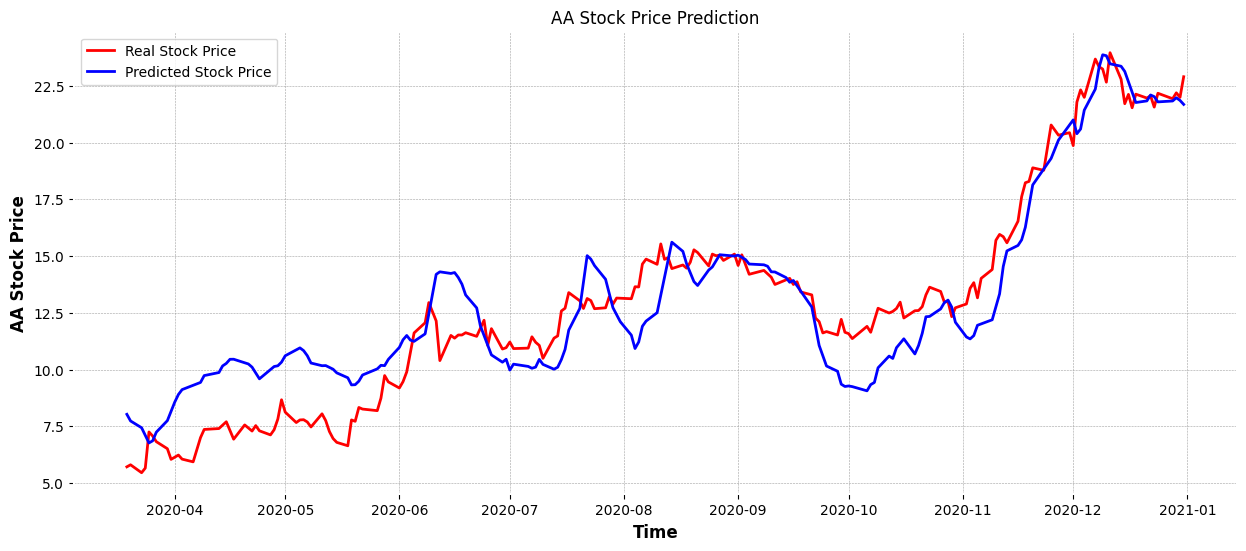

In [305]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(nrm_stocks_6_train[len(nrm_stocks_6_train)-len(y_test):].index, y_test[:,3], color = 'red', label = 'Real Stock Price')
axes.plot(nrm_stocks_6_train[len(nrm_stocks_6_train)-len(y_test):].index, y_test_pred[:,3], color = 'blue', label = 'Predicted Stock Price')
#axes.xticks(np.arange(0,394,50))
plt.title(tick_sym+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(tick_sym+' Stock Price')
plt.legend()
plt.show()

#Q7 Set up a trading module that will make some hard-coded logical decisions to buy, hold, sell(in any order, because in shorting you can sell first and buy later).

In [306]:
# Convert testing data and predicted data into dataframe so that we can use it in trading module
y_test_df = pd.DataFrame(y_test,columns = ["Open","High","Low","Close","Volume"])
y_test_pred_df = pd.DataFrame(y_test_pred,columns = ["Open","High","Low","Close","Volume"])
print("y_test as dataframe:")
display(y_test_df)
print("y_test_pred as dataframe:")
display(y_test_pred_df)

y_test as dataframe:


,Open,High,Low,Close,Volume
0,6.515800,6.665400,5.258501,5.717500,8457215.0
1,5.747400,6.136601,5.188702,5.807300,5505566.0
2,6.056800,6.156600,5.418200,5.458101,7727462.0
3,5.488000,5.932000,5.148800,5.662601,6087735.0
4,6.226402,7.463700,6.186501,7.254200,12836491.0
...,...,...,...,...,...
195,21.752501,22.610600,21.752499,22.171600,2747410.0
196,22.261400,22.291300,21.762499,21.932100,987993.0
197,22.051800,22.969801,22.041901,22.191500,3578538.0
198,22.061800,22.291300,21.103901,21.992001,3144857.0


y_test_pred as dataframe:


,Open,High,Low,Close,Volume
0,7.938831,7.206666,7.218307,8.030974,7209369.00
1,7.633327,6.953572,6.938694,7.738397,7396310.00
2,7.413167,6.471903,6.436874,7.438903,7281026.50
3,6.969181,6.301312,6.215832,7.067741,7560373.50
4,6.641395,6.032366,5.912691,6.770204,7657178.00
...,...,...,...,...,...
195,21.568123,21.718014,21.128796,21.792053,3553114.25
196,21.645231,21.796219,21.221527,21.832239,3171773.25
197,21.795830,21.868553,21.471519,21.972864,2297157.75
198,21.849339,22.181643,21.331079,21.857151,3045059.25


**Simple Moving Average (SMA): Trading Strategy**\
A simple Moving Average is the average market price of a security over a specified period. It is referred to as the ‘moving’ average since it is plotted on a chart bar by bar and forms a line that moves along the chart as the average price changes.

Calculation of Simple Moving Average\
The simple moving average is calculated by taking average of the price of a security over a period.

A simple moving averages trading strategy is employed by traders to chart the price movement of a security and ignore the day-to-day price fluctuations. Traders can compare short, medium, and long-term trends over large periods.

A 200-bar simple moving average is usually used as a substitute for the long-term trend. Likewise, a 50-bar simple moving average is used to evaluate the intermediate trend. Short period simple moving averages are used to determine short-term trends.

Various trading patterns use simple moving averages including the following:

Death Cross: A death cross occurs when the 50-day simple moving average falls below the 200-day simple moving average. A death cross is considered to be a bearish signal and indicates that the price is expected to fall further.\
Golden Cross: A golden cross occurs when the 50-day simple moving average rises above the 200-day simple moving average. A golden cross is viewed as a bullish signal and presents an opportunity to buy.



Source : https://www.indiainfoline.com/knowledge-center/trading-account/what-is-a-simple-moving-average-trading-strategy#:~:text=A%20simple%20moving%20averages%20trading,for%20the%20long%2Dterm%20trend.

In [307]:
class TradingModule:
    def __init__(self, actual_data = y_test_df["Close"], predicted_data = y_test_pred_df["Close"]):
        self.actual_data = actual_data  # Actual financial data (e.g., y_test)
        self.predicted_data = predicted_data  # Predicted financial data (e.g., y_test_pred)
        self.position = 0  # 0 for no position, 1 for long (buy), -1 for short (sell)
        self.signals = []  # List to store buy and sell signals for plotting

    def moving_average(self, window):
        # Calculate the moving average of the actual data (e.g., closing prices)
        return self.actual_data.rolling(window=window).mean()

    def trade(self):
        for i in range(len(self.actual_data)):
            if i < 2:  # Skip first two data points (no decision)
                continue

            ma5 = self.moving_average(5)
            ma20 = self.moving_average(10)

            # Buy signal (Golden Cross): Short-term moving average crosses above long-term moving average
            if ma5[i] > ma20[i] and ma5[i - 1] <= ma20[i - 1] and self.position == 0:
                if self.predicted_data[i] > self.actual_data[i]:
                    self.position = 1  # Buy
                    self.signals.append((self.actual_data.index[i], self.actual_data[i], 'buy'))

            # Sell signal (Death Cross): Short-term moving average crosses below long-term moving average
            elif ma5[i] < ma20[i] and ma5[i - 1] >= ma20[i - 1] and self.position == 1:
                if self.predicted_data[i] < self.actual_data[i]:
                    self.position = -1  # Sell
                    self.signals.append((self.actual_data.index[i], self.actual_data[i], 'sell'))

            # Close position: Short-term moving average crosses long-term moving average in opposite direction
            elif ma5[i] < ma20[i] and ma5[i - 1] > ma20[i - 1] and self.position == 1:
                if self.predicted_data[i] < self.actual_data[i]:
                    self.position = -1  # Sell
                    self.signals.append((self.actual_data.index[i], self.actual_data[i], 'sell'))

            elif ma5[i] > ma20[i] and ma5[i - 1] < ma20[i - 1] and self.position == -1:
                if self.predicted_data[i] > self.actual_data[i]:
                    self.position = 1  # Buy
                    self.signals.append((self.actual_data.index[i], self.actual_data[i], 'buy'))

            # Hold position if no buy or sell signal
            else:
                self.position = 0

        # Execute trading actions (buy/sell) based on position
        for signal in self.signals:
            if signal[2] == 'buy':
                print(f"Buy at {signal[0]}, Price: {signal[1]}")
            elif signal[2] == 'sell':
                print(f"Sell at {signal[0]}, Price: {signal[1]}")

    def plot_signals(self):
        # Plot the actual data
        plt.figure(figsize=(12, 6))
        plt.plot(self.actual_data.index, self.actual_data, label='Actual Data', color='blue')

        # Plot the buy signals (green arrows)
        for signal in self.signals:
            if signal[2] == 'buy':
                plt.scatter(signal[0], signal[1], marker='^', color='red', label='Buy', s=100)

        # Plot the sell signals (red arrows)
        for signal in self.signals:
            if signal[2] == 'sell':
                plt.scatter(signal[0], signal[1], marker='v', color='yellow', label='Sell', s=100)

        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title('Buy and Sell Signals')
        plt.legend()
        plt.grid(True)
        plt.show()


In [308]:
# Call trading_module class
trading_module = TradingModule()

Buy at 15, Price: 7.363900661468506
Buy at 25, Price: 7.304000377655029
Buy at 28, Price: 7.822900295257568
Buy at 45, Price: 8.26200008392334


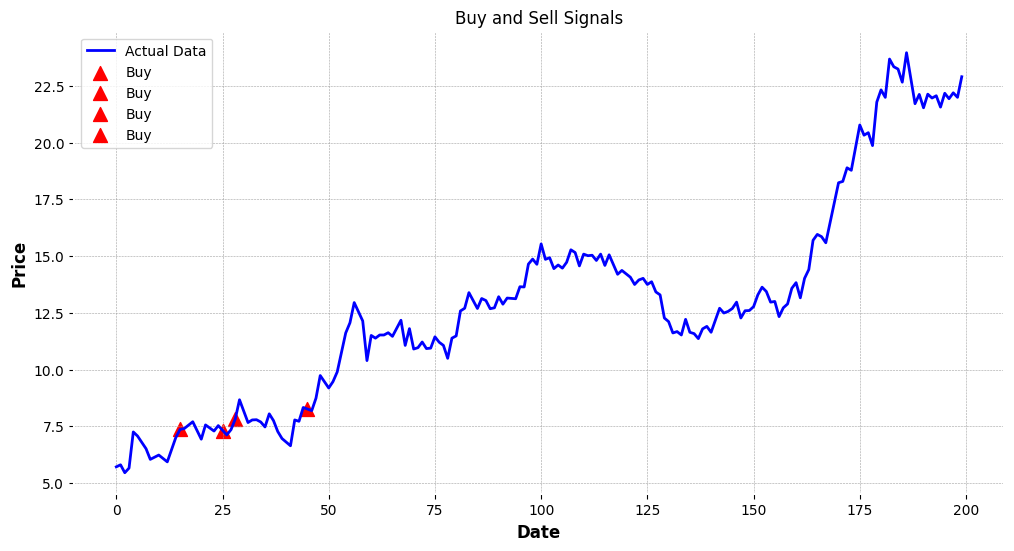

In [309]:
# Decisions based on SMA Logic
trading_module.trade()
trading_module.plot_signals()

#Q8 Test the trading system on the latest years on which the model was not trained.

In [310]:
# Since we want the last 2 years for testing, taking those two years
date = pd.to_datetime('2021-01-01').date()
nrm_stocks_6_test= nrm_stocks_6[nrm_stocks_6.index.date >= date]
print(nrm_stocks_6_test)

                Open      High       Low     Close    Volume
Datetime                                                    
2021-01-04 -0.636434 -0.608030 -0.633078 -0.657370 -0.216941
2021-01-05 -0.655049 -0.631191 -0.626158 -0.627413 -0.340784
2021-01-06 -0.569156 -0.523107 -0.540214 -0.518286  0.170507
2021-01-07 -0.488278 -0.485211 -0.499424 -0.516149 -0.238465
2021-01-08 -0.511892 -0.536443 -0.531469 -0.533268 -0.698628
...              ...       ...       ...       ...       ...
2022-02-18  3.131053  3.188184  3.197364  3.274026 -0.001692
2022-02-22  3.415831  3.308457  3.019256  2.980248  0.911563
2022-02-23  3.003369  2.998983  3.019263  3.068167  0.264322
2022-02-24  3.077971  3.123476  2.781292  2.923779  1.744700
2022-02-25  2.921594  3.188887  2.922246  3.249009  0.441222

[290 rows x 5 columns]


In [311]:
# Again spliting the last 2 year data into training and testing set
look_back = 60
load_data_8 = data_loader.load_data(nrm_stocks_6_test,look_back)
scaler_8 = nrm_stocks_scaler[0]
x_train_8, y_train_8, x_test_8, y_test_8 = load_data_8
print('x_train.shape = ',x_train_8.shape)
print('y_train.shape = ',y_train_8.shape)
print('x_test.shape = ',x_test_8.shape)
print('y_test.shape = ',y_test_8.shape)

x_train.shape =  torch.Size([184, 59, 5])
y_train.shape =  torch.Size([184, 5])
x_test.shape =  torch.Size([46, 59, 5])
y_test.shape =  torch.Size([46, 5])


In [312]:
# Make predictions using the trained model on the last 2 years data and check the accuracy
y_train_pred_8 = model(x_train_8)
y_test_pred_8 = model(x_test_8)

# Invert (reverse) the predictions to the original scale
# This is necessary because the model was trained on scaled data
y_train_pred_8 = scaler.inverse_transform(y_train_pred_8.detach().numpy())  # Inverse transform predictions for training data
y_train_8 = scaler.inverse_transform(y_train_8.detach().numpy())  # Inverse transform actual training data
y_test_pred_8 = scaler.inverse_transform(y_test_pred_8.detach().numpy())  # Inverse transform predictions for testing data
y_test_8 = scaler.inverse_transform(y_test_8.detach().numpy())  # Inverse transform actual testing data

# Calculate the Root Mean Squared Error (RMSE) for both training and testing predictions
# RMSE measures the average prediction error, with lower values indicating better model performance
# For RMSE calculation, we compare the predicted and actual values for the first column (assuming a univariate prediction task)
trainScore_8= math.sqrt(mean_squared_error(y_train_8[:, 0], y_train_pred_8[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore_8))
testScore_8 = math.sqrt(mean_squared_error(y_test_8[:, 0], y_test_pred_8[:, 0]))
print('Test Score: %.2f RMSE' % (testScore_8))
#Source : Kaggle


Train Score: 1.93 RMSE
Test Score: 5.90 RMSE


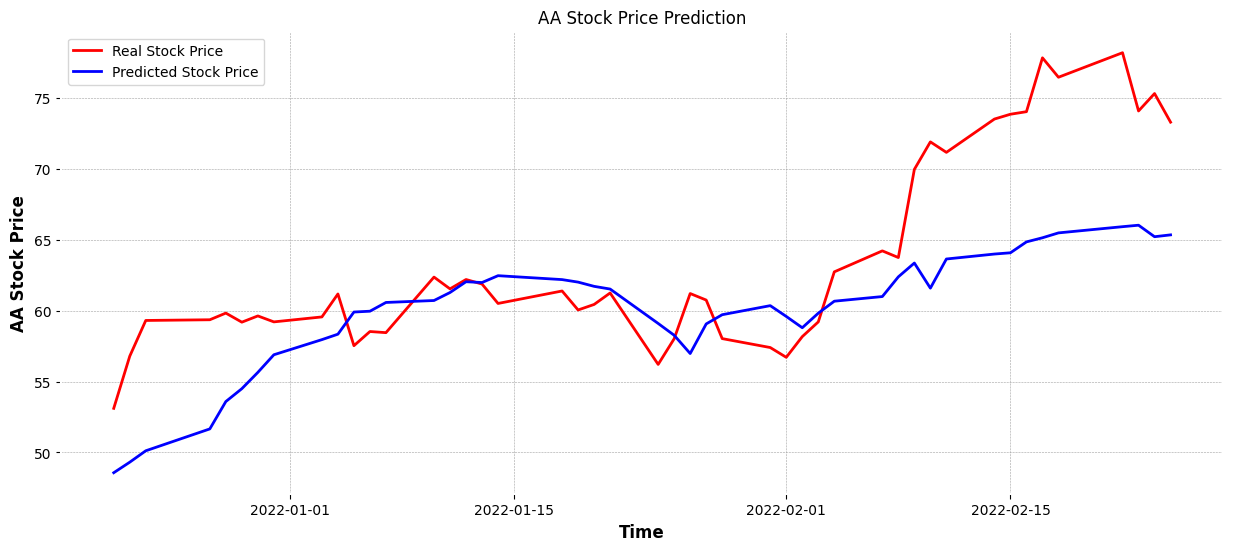

In [313]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(nrm_stocks_6_test[len(nrm_stocks_6_test)-len(y_test_8):].index, y_test_8[:,3], color = 'red', label = 'Real Stock Price')
axes.plot(nrm_stocks_6_test[len(nrm_stocks_6_test)-len(y_test_8):].index, y_test_pred_8[:,3], color = 'blue', label = 'Predicted Stock Price')
#axes.xticks(np.arange(0,394,50))
plt.title(tick_sym+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(tick_sym+' Stock Price')
plt.legend()
plt.show()

In [314]:
# Convert it into dataframe to feed it into trading module with costs
y_test_df_8 = pd.DataFrame(y_test_8,columns = ["Open","High","Low","Close","Volume"])
y_test_pred_df_8 = pd.DataFrame(y_test_pred_8,columns = ["Open","High","Low","Close","Volume"])

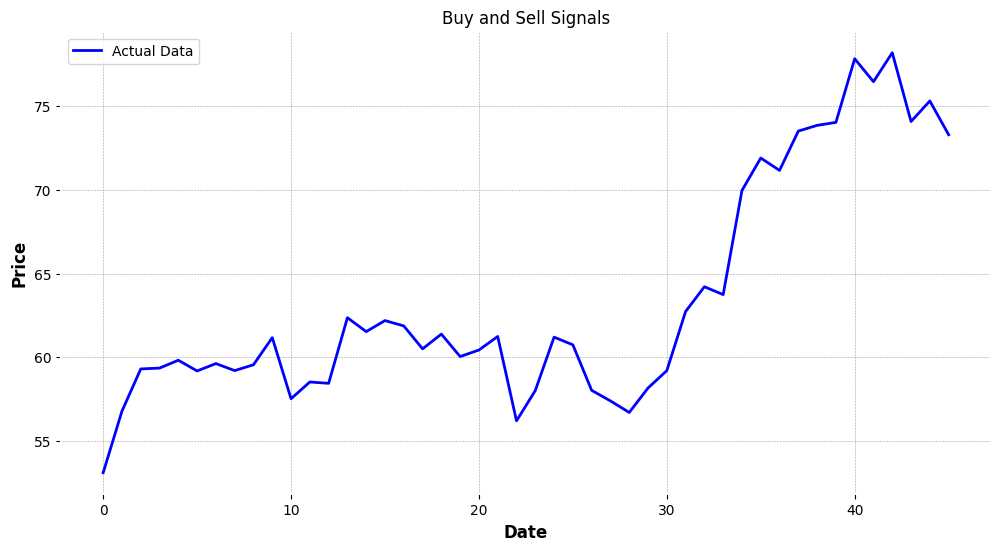

In [315]:
# testing trading module defined in Q7
trading_module_8 = TradingModule(y_test_df_8["Close"],y_test_pred_df_8["Close"])
trading_module_8.trade()
trading_module_8.plot_signals()

#(a) Does the price prediction error increase as you go further from the last time on which it was trained?

Yes the price prediction error increases as we test the model on new data. This can be because of the **Changing Market Dynamics:** Market dynamics evolve over time due to various factors, including economic events, news, geopolitical events, and changes in market participants' behavior. An LSTM model trained on historical data may not effectively capture these evolving dynamics, leading to prediction errors.\
RMSE on trained set = 1.76\
RMSE on set of last two years on which model was not trained = 5.90

#(b) Can you profitably trade with the bid-ask spread and commissions taken into account?

In [316]:
class TradingModuleWithCosts:
    def __init__(self, actual_data, predicted_data, bid_ask_spread = 0.01, commission = 0.5):
        # Initialize the trading module with actual and predicted data, bid-ask spread, and commission.
        self.actual_data = actual_data
        self.predicted_data = predicted_data
        self.position = 0  # Initialize position: 0 for no position, 1 for long (buy), -1 for short (sell)
        self.signals = []  # List to store buy and sell signals for plotting
        self.bid_ask_spread = bid_ask_spread  # Bid-ask spread represents the cost of entering or exiting a position
        self.commission = commission  # Commission fee for each trade
        self.balance = 100000  # Initialize balance (account balance)
        self.equity = []  # List to store equity at each step of the simulation
    def moving_average(self, window):
        # Calculate the moving average of the actual data (e.g., closing prices)
        return self.actual_data.rolling(window=window).mean()
    def trade_with_costs(self):
        initial_balance = self.balance
        for i in range(len(self.actual_data)):
            if i < 2:
                continue  # Skip the first two data points as there are no trading decisions

            ma5 = self.moving_average(5)  # Calculate the 5-period moving average
            ma20 = self.moving_average(10)  # Calculate the 10-period moving average

            # Buy signal (Golden Cross): Short-term moving average crosses above long-term moving average
            if ma5[i] > ma20[i] and ma5[i - 1] <= ma20[i - 1] and self.position == 0:
                if self.predicted_data[i] > self.actual_data[i]:
                    self.position = 1  # Set position to long (buy)
                    entry_price = self.actual_data[i] + self.bid_ask_spread / 2
                    self.balance -= (entry_price + self.commission)  # Deduct entry cost and commission
                    self.signals.append((self.actual_data.index[i], entry_price, 'buy'))

            # Sell signal (Death Cross): Short-term moving average crosses below long-term moving average
            elif ma5[i] < ma20[i] and ma5[i - 1] >= ma20[i - 1] and self.position == 1:
                if self.predicted_data[i] < self.actual_data[i]:
                    self.position = 0  # Clear position
                    exit_price = self.actual_data[i] - self.bid_ask_spread / 2
                    self.balance += (exit_price - self.commission)  # Add exit gain and deduct commission
                    self.signals.append((self.actual_data.index[i], exit_price, 'sell'))

            # Close position: Short-term moving average crosses long-term moving average in opposite direction
            elif ma5[i] < ma20[i] and ma5[i - 1] > ma20[i - 1] and self.position == 1:
                if self.predicted_data[i] < self.actual_data[i]:
                    self.position = 0  # Clear position
                    exit_price = self.actual_data[i] - self.bid_ask_spread / 2
                    self.balance += (exit_price - self.commission)  # Add exit gain and deduct commission
                    self.signals.append
        # Calculate the total profit by subtracting the initial balance from the final balance
        total_profit = (self.balance - initial_balance)/1000
        print("Total Profit(%):" ,total_profit,"%")

    def plot_signals(self):
        # Plot the actual data and buy/sell signals with costs
        plt.figure(figsize=(12, 6))
        plt.plot(self.actual_data.index, self.actual_data, label='Actual Data', color='blue')
        for signal in self.signals:
            if signal[2] == 'buy':
                plt.scatter(signal[0], signal[1], marker='^', color='red', label='Buy', s=100)
            elif signal[2] == 'sell':
                plt.scatter(signal[0], signal[1], marker='v', color='yellow', label='Sell', s=100)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title('Buy and Sell Signals with Costs')
        plt.legend()
        plt.grid(True)
        plt.show()

Total Profit(%): 0.002592199077596888 %


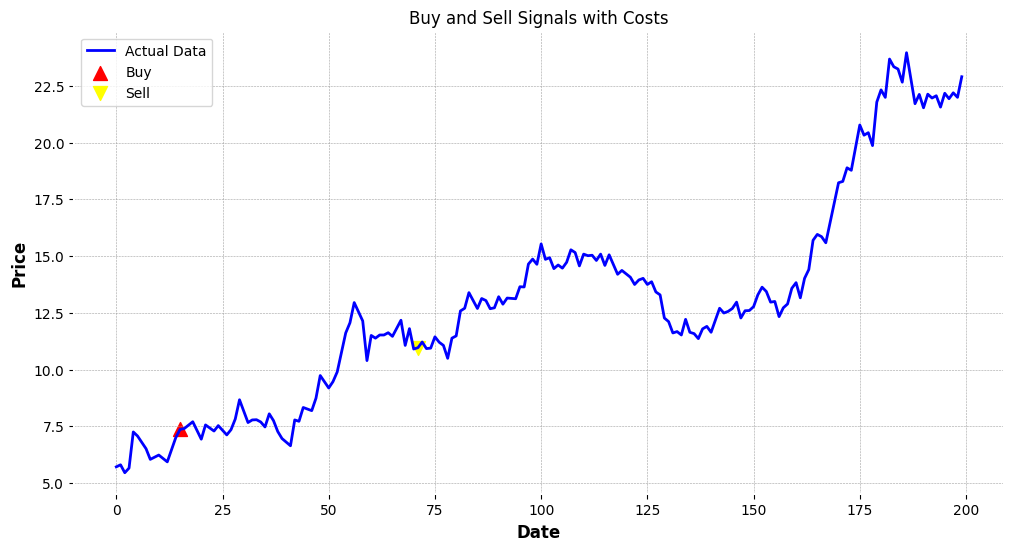

In [317]:
# Trading Module With costs
trading_module_with_costs = TradingModuleWithCosts(actual_data=y_test_df["Close"], predicted_data=y_test_pred_df["Close"])
trading_module_with_costs.trade_with_costs()

trading_module_with_costs.plot_signals()


We cannot say surely that we can profitably trade with bid-ask and commissions and there was no such profit in Q7 without this and there is slight profit here.

#(c) How does your profitability compare to a simple buy-and-hold-strategy over long term(e.g. one or two years)?

We applied the trading module for data from 2007 to 2020 in Q7 and there we were able to buy some stocks to get profit but for 2 years(Q8(a)) there was no buy and sell so we can say there was no profit.